https://public.opendatasoft.com/explore/dataset/donnees-synop-essentielles-omm/download/?format=csv&q=date:%5B2018-12-31T23:00:00Z+TO+2022-10-01T21:59:59Z%5D&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B




https://gmd.copernicus.org/articles/14/1553/2021/

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [79]:
# import wget

# site_url = 'https://public.opendatasoft.com/explore/dataset/donnees-synop-essentielles-omm/download/?format=csv&q=date:%5B2018-12-31T23:00:00Z+TO+2022-10-01T21:59:59Z%5D&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B'
# file_name = wget.download(site_url)



In [80]:
# !mv donnees-synop-essentielles-omm.csv data_meteo.csv

In [81]:
df = pd.read_csv('data_meteo.csv',sep=';')
df.head()

,ID OMM station,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Point de rosée,Humidité,...,Altitude,communes (name),communes (code),EPCI (name),EPCI (code),department (name),department (code),region (name),region (code),mois_de_l_annee
0,71805,2020-06-27T20:00:00+02:00,101120.0,20.0,3.0,250.0,6.0,289.75,287.55,87.0,...,21,Saint-Pierre,97502,NaN,NaN,Saint-Pierre-et-Miquelon,975,Saint-Pierre-et-Miquelon,975.0,6
1,7481,2020-06-27T23:00:00+02:00,101500.0,110.0,3.0,60.0,1.0,297.55,289.75,62.0,...,235,Colombier-Saugnieu,69299,CC de l'Est Lyonnais (CCEL),246900575.0,Rhône,69,Auvergne-Rhône-Alpes,84.0,6
2,7558,2020-06-27T23:00:00+02:00,101590.0,150.0,3.0,310.0,3.3,294.25,290.25,78.0,...,712,Millau,12145,CC de Millau Grands Causses,241200567.0,Aveyron,12,Occitanie,76.0,6
3,7650,2020-06-27T23:00:00+02:00,101690.0,90.0,3.0,150.0,2.2,296.05,287.05,57.0,...,9,Marignane,13054,Métropole d'Aix-Marseille-Provence,200054807.0,Bouches-du-Rhône,13,Provence-Alpes-Côte d'Azur,93.0,6
4,7130,2020-06-28T02:00:00+02:00,101490.0,120.0,1.0,230.0,3.2,288.35,285.45,83.0,...,36,Saint-Jacques-de-la-Lande,35281,Rennes Métropole,243500139.0,Ille-et-Vilaine,35,Bretagne,53.0,6


In [82]:
df.shape

(648685, 82)

In [83]:
df['Date'] = df['Date'].astype('string')

In [84]:
for i in range(df.shape[0]):
    df['Date'][i]=df['Date'][i][0:10]+" "+df['Date'][i][11:19]


In [85]:
df['Date']=pd.to_datetime(df['Date'])


In [86]:
columns = ['Date','region (name)','Température (°C)','Pression au niveau mer','Vitesse du vent moyen 10 mn','Humidité','Pression station','Rafales sur une période','Précipitations dans les 3 dernières heures']

In [87]:
df_Date= df[columns]
df_Date.head()

,Date,region (name),Température (°C),Pression au niveau mer,Vitesse du vent moyen 10 mn,Humidité,Pression station,Rafales sur une période,Précipitations dans les 3 dernières heures
0,2020-06-27 20:00:00,Saint-Pierre-et-Miquelon,16.6,101120.0,6.0,87.0,101040.0,9.5,0.0
1,2020-06-27 23:00:00,Auvergne-Rhône-Alpes,24.4,101500.0,1.0,62.0,98770.0,1.6,0.0
2,2020-06-27 23:00:00,Occitanie,21.1,101590.0,3.3,78.0,93640.0,5.4,0.0
3,2020-06-27 23:00:00,Provence-Alpes-Côte d'Azur,22.9,101690.0,2.2,57.0,101320.0,2.9,0.0
4,2020-06-28 02:00:00,Bretagne,15.2,101490.0,3.2,83.0,101050.0,6.3,0.0


In [88]:
df_Date = df_Date.dropna()
df_Date.shape

(473732, 9)

In [89]:
df_Date.set_index('Date', inplace = True)
df_Date.head()

,region (name),Température (°C),Pression au niveau mer,Vitesse du vent moyen 10 mn,Humidité,Pression station,Rafales sur une période,Précipitations dans les 3 dernières heures
Date,,,,,,,,
2020-06-27 20:00:00,Saint-Pierre-et-Miquelon,16.6,101120.0,6.0,87.0,101040.0,9.5,0.0
2020-06-27 23:00:00,Auvergne-Rhône-Alpes,24.4,101500.0,1.0,62.0,98770.0,1.6,0.0
2020-06-27 23:00:00,Occitanie,21.1,101590.0,3.3,78.0,93640.0,5.4,0.0
2020-06-27 23:00:00,Provence-Alpes-Côte d'Azur,22.9,101690.0,2.2,57.0,101320.0,2.9,0.0
2020-06-28 02:00:00,Bretagne,15.2,101490.0,3.2,83.0,101050.0,6.3,0.0


# GroupBY : 'Date'

In [90]:
df_Date = df_Date.groupby(by=['Date']).mean()

df_Date.head()

/var/folders/30/qyvjf51j20q5ybc7cqckcgnm0000gn/T/ipykernel_36238/4196980697.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_Date = df_Date.groupby(by=['Date']).mean()


,Température (°C),Pression au niveau mer,Vitesse du vent moyen 10 mn,Humidité,Pression station,Rafales sur une période,Précipitations dans les 3 dernières heures
Date,,,,,,,
2019-01-01 01:00:00,7.738636,103197.272727,2.679545,85.681818,101559.318182,5.129545,-0.004545
2019-01-01 04:00:00,6.943182,103215.227273,3.020455,85.863636,101567.272727,5.293182,-0.004545
2019-01-01 07:00:00,6.700000,103189.767442,2.883721,86.813953,101510.000000,5.172093,-0.009302
2019-01-01 10:00:00,7.568182,103253.409091,2.627273,84.704545,101605.454545,4.959091,0.011364
2019-01-01 13:00:00,9.095349,103211.162791,3.123256,80.139535,101542.558140,5.753488,-0.004651


In [91]:
df_Date.shape

(10954, 7)

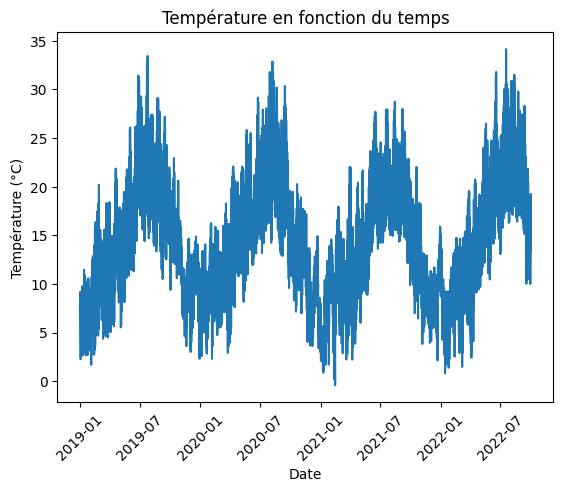

In [92]:
plt.plot(df_Date.index,df_Date['Température (°C)'])
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Température (°C)')
plt.title('Température en fonction du temps')
plt.show()

In [93]:
df_region = df[columns]
df_region = df_region.dropna()

# GroupBY : 'Date' & 'Region'

In [94]:
df_region = df_region.groupby(by=['Date','region (name)']).mean()
df_region.head()

Température (°C)  \
Date                region (name)                               
2019-01-01 01:00:00 Auvergne-Rhône-Alpes             6.766667   
                    Bourgogne-Franche-Comté          7.100000   
                    Bretagne                         8.450000   
                    Centre-Val de Loire              7.050000   
                    Corse                            6.300000   

                                             Pression au niveau mer  \
Date                region (name)                                     
2019-01-01 01:00:00 Auvergne-Rhône-Alpes                   103330.0   
                    Bourgogne-Franche-Comté                103480.0   
                    Bretagne                               103760.0   
                    Centre-Val de Loire                    103650.0   
                    Corse                                  102690.0   

                                             Vitesse du vent moyen 10 mn  \
Date                region (name)                                          
2019-01-01 01:00:00 Auvergne-Rhône-Alpes                        4.433333   
                    Bourgogne-Franche-Comté                     2.000000   
                    Bretagne                                    1.700000   
                    Centre-Val de Loire                         1.350000   
                    Corse                                       3.000000   

                                             Humidité  Pression station  \
Date                region (name)                                         
2019-01-01 01:00:00 Auvergne-Rhône-Alpes         88.0          100690.0   
                    Bourgogne-Franche-Comté      93.0          100670.0   
                    Bretagne                     82.0          103025.0   
                    Centre-Val de Loire          90.5          101915.0   
                    Corse                        78.0          102560.0   

                                             Rafales sur une période  \
Date                region (name)                                      
2019-01-01 01:00:00 Auvergne-Rhône-Alpes                    8.333333   
                    Bourgogne-Franche-Comté                 3.700000   
                    Bretagne                                3.850000   
                    Centre-Val de Loire                     4.400000   
                    Corse                                   5.200000   

                                             Précipitations dans les 3 dernières heures  
Date                region (name)                                                        
2019-01-01 01:00:00 Auvergne-Rhône-Alpes                                      -0.033333  
                    Bourgogne-Franche-Comté                                    0.000000  
                    Bretagne                                                   0.000000  
                    Centre-Val de Loire                                        0.000000  
                    Corse                                                      0.000000

In [95]:
df_region = df_region.reset_index(level=['Date','region (name)'])
df_region['region (name)'] = df_region['region (name)'].astype('string')
df_region

,Date,region (name),Température (°C),Pression au niveau mer,Vitesse du vent moyen 10 mn,Humidité,Pression station,Rafales sur une période,Précipitations dans les 3 dernières heures
0,2019-01-01 01:00:00,Auvergne-Rhône-Alpes,6.766667,103330.0,4.433333,88.0,100690.0,8.333333,-0.033333
1,2019-01-01 01:00:00,Bourgogne-Franche-Comté,7.100000,103480.0,2.000000,93.0,100670.0,3.700000,0.000000
2,2019-01-01 01:00:00,Bretagne,8.450000,103760.0,1.700000,82.0,103025.0,3.850000,0.000000
3,2019-01-01 01:00:00,Centre-Val de Loire,7.050000,103650.0,1.350000,90.5,101915.0,4.400000,0.000000
4,2019-01-01 01:00:00,Corse,6.300000,102690.0,3.000000,78.0,102560.0,5.200000,0.000000
...,...,...,...,...,...,...,...,...,...
192730,2022-10-01 23:00:00,Pays de la Loire,17.400000,102200.0,4.500000,96.0,101890.0,10.000000,-0.100000
192731,2022-10-01 23:00:00,Provence-Alpes-Côte d'Azur,18.500000,102165.0,3.400000,78.5,101820.0,5.200000,0.000000
192732,2022-10-01 23:00:00,Saint-Pierre-et-Miquelon,12.200000,101570.0,8.000000,90.0,101490.0,12.300000,0.000000
192733,2022-10-01 23:00:00,Terres australes et antarctiques françaises,-0.300000,101500.0,3.600000,79.0,101120.0,5.700000,0.000000


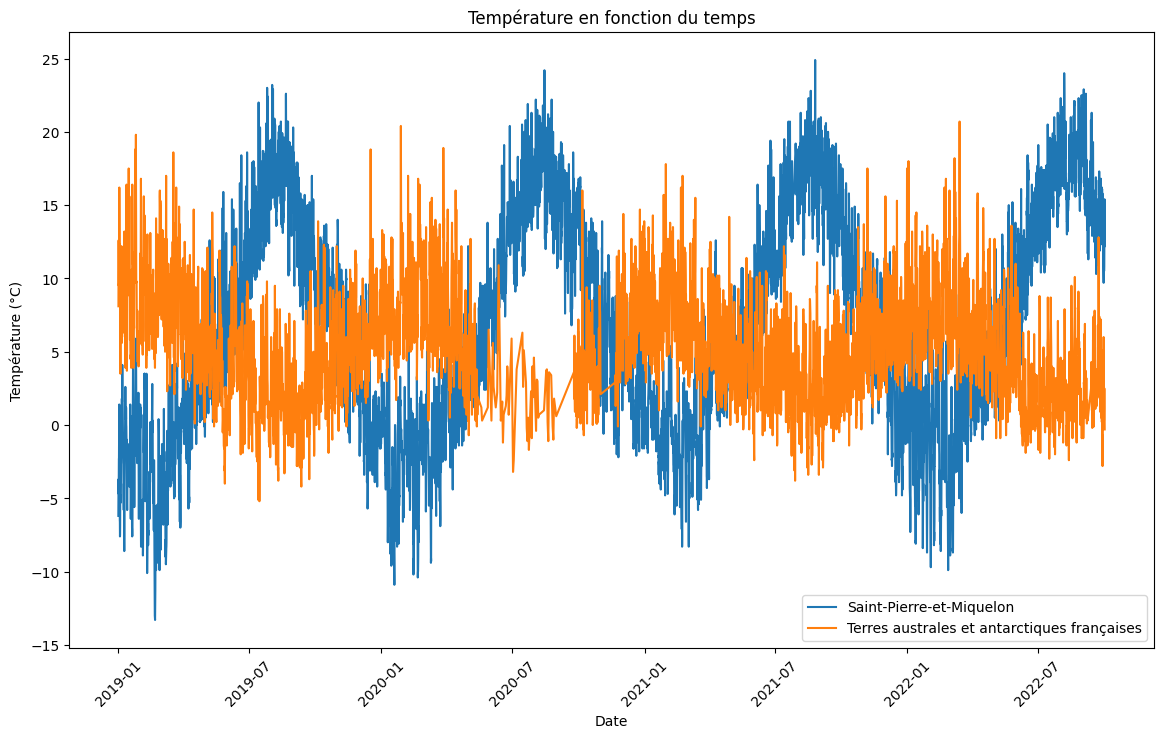

In [96]:
plt.figure(figsize=(14,8))

for region in ['Saint-Pierre-et-Miquelon','Terres australes et antarctiques françaises']:
    df_temporaire = df_region[df_region['region (name)']== region]
    plt.plot(df_temporaire['Date'],df_temporaire['Température (°C)'])
    plt.xticks(rotation=45)

plt.xlabel('Date')
plt.ylabel('Température (°C)')
plt.title('Température en fonction du temps')
plt.legend(['Saint-Pierre-et-Miquelon','Terres australes et antarctiques françaises'])
plt.show()
del df_temporaire


## Création sous base de données pour chaque régions

In [97]:
df_region_test = pd.get_dummies(df_region,columns=['region (name)'],prefix="",prefix_sep='')

In [98]:
df_region_test

,Date,Température (°C),Pression au niveau mer,Vitesse du vent moyen 10 mn,Humidité,Pression station,Rafales sur une période,Précipitations dans les 3 dernières heures,Auvergne-Rhône-Alpes,Bourgogne-Franche-Comté,...,Martinique,Mayotte,Normandie,Nouvelle-Aquitaine,Occitanie,Pays de la Loire,Provence-Alpes-Côte d'Azur,Saint-Pierre-et-Miquelon,Terres australes et antarctiques françaises,Île-de-France
0,2019-01-01 01:00:00,6.766667,103330.0,4.433333,88.0,100690.0,8.333333,-0.033333,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2019-01-01 01:00:00,7.100000,103480.0,2.000000,93.0,100670.0,3.700000,0.000000,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2019-01-01 01:00:00,8.450000,103760.0,1.700000,82.0,103025.0,3.850000,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2019-01-01 01:00:00,7.050000,103650.0,1.350000,90.5,101915.0,4.400000,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2019-01-01 01:00:00,6.300000,102690.0,3.000000,78.0,102560.0,5.200000,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192730,2022-10-01 23:00:00,17.400000,102200.0,4.500000,96.0,101890.0,10.000000,-0.100000,0,0,...,0,0,0,0,0,1,0,0,0,0
192731,2022-10-01 23:00:00,18.500000,102165.0,3.400000,78.5,101820.0,5.200000,0.000000,0,0,...,0,0,0,0,0,0,1,0,0,0
192732,2022-10-01 23:00:00,12.200000,101570.0,8.000000,90.0,101490.0,12.300000,0.000000,0,0,...,0,0,0,0,0,0,0,1,0,0
192733,2022-10-01 23:00:00,-0.300000,101500.0,3.600000,79.0,101120.0,5.700000,0.000000,0,0,...,0,0,0,0,0,0,0,0,1,0


In [111]:
from typing import Counter


regions = []
for region in df_region['region (name)']:
    regions.append(region)
regions = Counter(regions).keys()
len(regions)

19

In [102]:
df_region_test[regions[1]]

0         0
1         1
2         0
3         0
4         0
         ..
192730    0
192731    0
192732    0
192733    0
192734    0
Name: Bourgogne-Franche-Comté, Length: 192735, dtype: uint8

In [54]:
#!mkdir bdd_regions


In [56]:
for regions in df_region['region (name)']:
    regions.to_csv()

AttributeError: 'str' object has no attribute 'to_csv'

# Trouver la périodicité

Nous pouvons imaginer une saisonalité de 1 ans soit 365 * 24 / 3 = 2920 car nous avons un relevé de données toutes les 3 heures.

Vérifions ça.

In [ ]:
df_temporaire = pd.DataFrame(df_Date.index.astype('string'))
for year in range (df_temporaire.shape[0]):
    df_temporaire['Date'][year] = df_temporaire['Date'][year][0:4]

df_temporaire['Date'].value_counts()


2020    2926
2021    2918
2022    2192
2019     976
Name: Date, dtype: Int64

# Décomposition STL

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL

CPU times: user 10.9 s, sys: 51.3 ms, total: 11 s
Wall time: 10.9 s


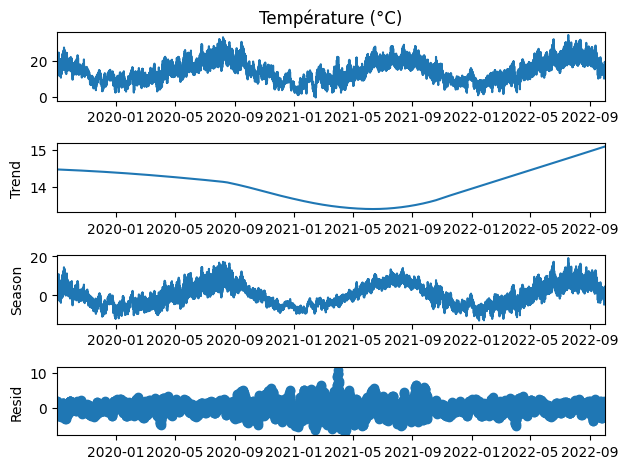

In [ ]:
result = STL(df_Date['Température (°C)'], period=2920).fit()

_ = result.plot()

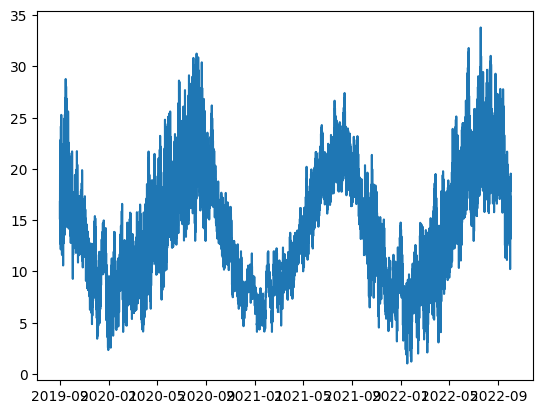

In [ ]:
plt.plot(result.seasonal+result.trend)

# NaiveForcaster
## Avec la database sur la moyenne des températures sur le territoire Français
### Réalisé uniquement avec les données de températures

In [ ]:
from sktime.forecasting.model_selection import temporal_train_test_split
#from sktime.performance_metrics.forecasting import smape_loss
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error as smape_loss
from sktime.utils.plotting import plot_series

def plot_ys(*args, **kwargs):
    # restore previous behaviour (jfb)
    nb_series=len(args)
    plot_series(*args, **kwargs, markers=['' for k in range(nb_series)])

7012 2000


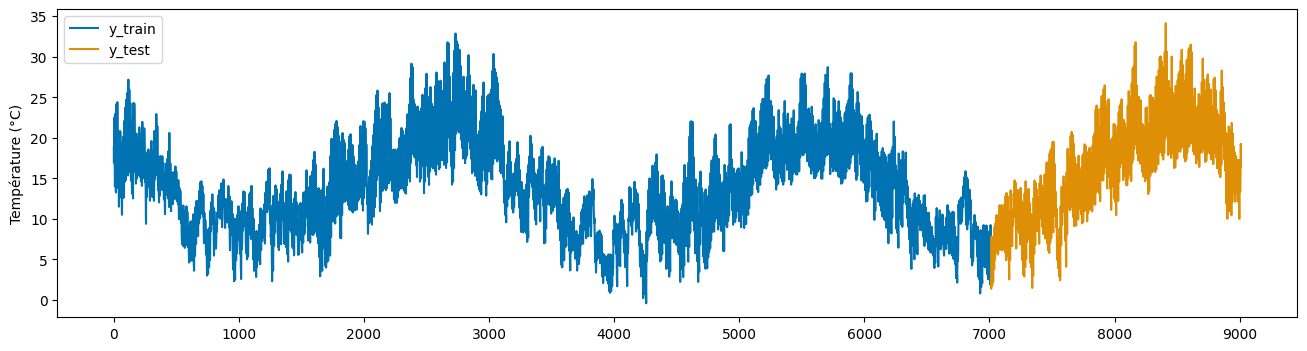

In [ ]:
y = pd.Series(data=df_Date['Température (°C)'].reset_index(drop=True)) #index=t[1:],
y_train, y_test = temporal_train_test_split(y, test_size=2000)
plot_ys(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

In [ ]:
fh = np.arange(1,len(y_test)+1) 


In [ ]:
# Pour limiter le nombre de points, on ne prend que les 200 derniers
y_train = y_train[-4000:]


30 2.8354244379702194
1000 1.169750889473684
2000 0.9271342668021557
2500 0.401103128228619
2900 0.3792963625736007
2910 0.26691387467770145
2920 0.42270482108678165
la valeur la plus faible en loss correspond à une saisonalité de :  2910


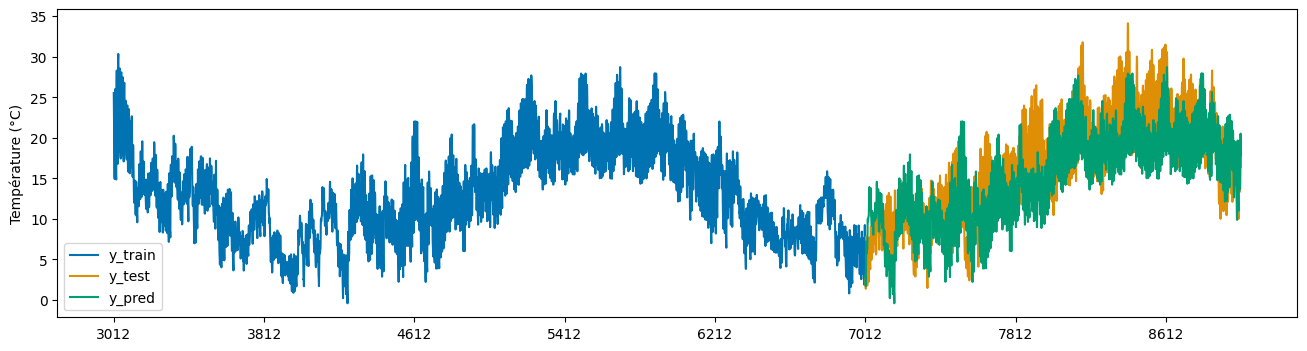

In [ ]:
# using sktime 
res = []
val = [30,1000, 2000, 2500,2900,2910, 2920]
from sktime.forecasting.naive import NaiveForecaster
for i in val:
    forecaster = NaiveForecaster(strategy="last",sp=i)
    forecaster.fit(y_train)
    y_pred = forecaster.predict(fh)
    res.append(smape_loss(y_pred, y_test))
    print(i,res[-1])
saisonalite = val[res.index(min(res))]

print("la valeur la plus faible en loss correspond à une saisonalité de : ",saisonalite)

forecaster = NaiveForecaster(strategy="last",sp=saisonalite)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
smape_loss(y_pred, y_test)
plot_ys(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
